## 1 - Exploratory data analysis

We will do exploratory data analysis into the data to have our first intutions. 

The following steps are done in this section: 

 - Data extraction : Load the dataset and have a look at it.
 - Cleaning : Process missing values if there are any.
 - Plotting : Generate some charts to identify hidden insights and correlations in the data. 
 - Assumptions : Formulate hypotheses from the plots.


In [1]:
# Import the necessary libraries for processing the data 
import pandas as pd 
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt 
import matplotlib 
matplotlib.style.use('ggplot')
import numpy as np 

In [2]:
#load the dataset from csv file to DataFrame 
data = pd.read_csv('C:\\Users\\Seifemichael\\Downloads\\student_performance\\student_performance\\student-mat.csv',sep=';')
data.shape 

(395, 33)

(395, 33)

In [3]:
#pandas allows you to view the peak of the dataset 
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


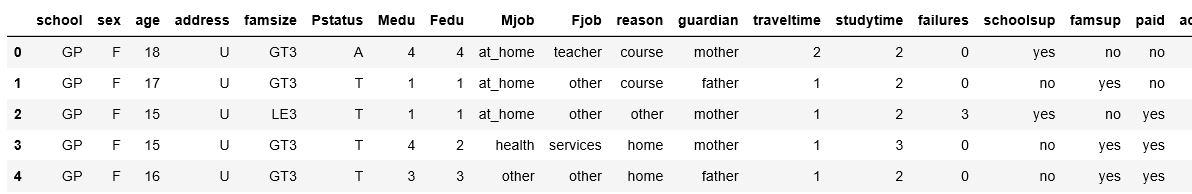

In [4]:
# To view the last 10 rows of the dataset 
data.tail(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
385,MS,F,18,R,GT3,T,2,2,at_home,other,other,mother,2,3,0,no,no,yes,no,yes,yes,no,no,5,3,3,1,3,4,2,10,9,10
386,MS,F,18,R,GT3,T,4,4,teacher,at_home,reputation,mother,3,1,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,3,2,2,5,7,6,5,6
387,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,0,7,5,0
388,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,7,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


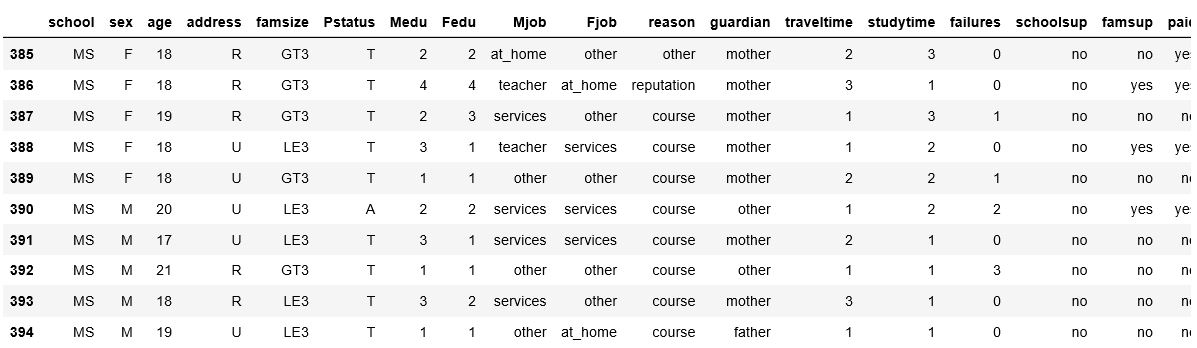

In [5]:
# To view random sample of the dataset 
data.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
235,GP,M,16,U,GT3,T,3,2,at_home,other,reputation,mother,2,3,0,no,no,no,yes,yes,yes,yes,yes,5,3,3,1,3,2,10,11,9,10
57,GP,M,15,U,GT3,T,4,4,teacher,health,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,no,no,3,2,2,1,1,5,4,14,15,15
342,GP,M,18,U,LE3,T,3,4,services,other,home,mother,1,2,0,no,no,no,yes,yes,yes,yes,yes,4,3,3,1,3,5,11,16,15,15
17,GP,F,16,U,GT3,T,3,3,other,other,reputation,mother,3,2,0,yes,yes,no,yes,yes,yes,no,no,5,3,2,1,1,4,4,8,10,10
259,GP,F,17,U,LE3,T,2,2,services,services,course,father,1,4,0,no,no,yes,yes,yes,yes,yes,yes,3,4,1,1,1,2,0,10,9,0


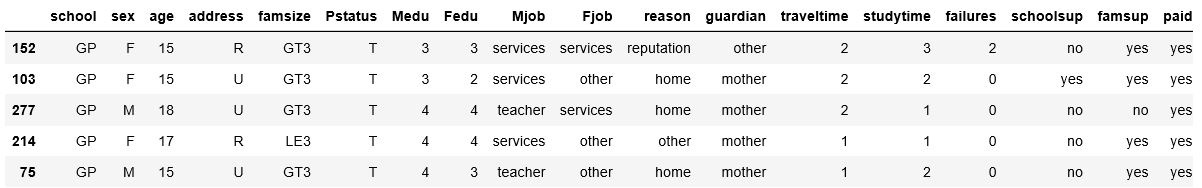

In [6]:
# Basic statistics on the Pandas DataFrame and only for numeric columns 
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


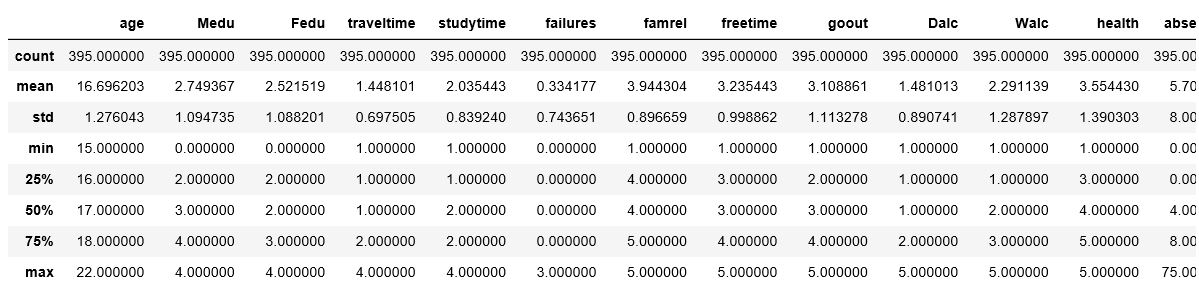

In [7]:
#The summary of the dataset and also show the quality of the data (if it contains null values)
#data.info()
data.info(verbose=True, null_counts=True)

##data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

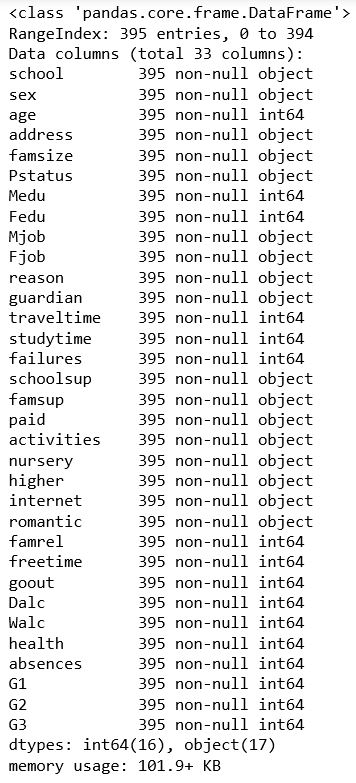

F    133
M    132
Name: sex, dtype: int64
F    75
M    55
Name: sex, dtype: int64


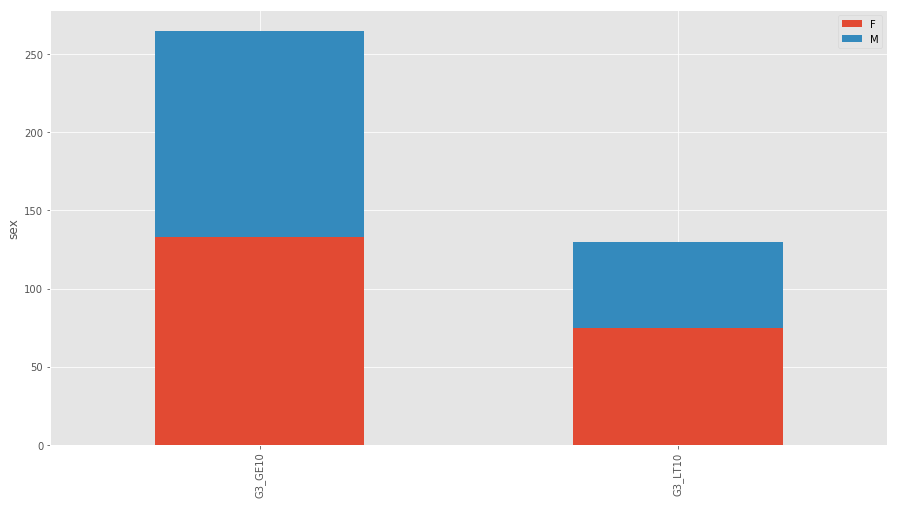

0    234
1     24
3      4
2      3
Name: failures, dtype: int64
0    78
1    26
2    14
3    12
Name: failures, dtype: int64


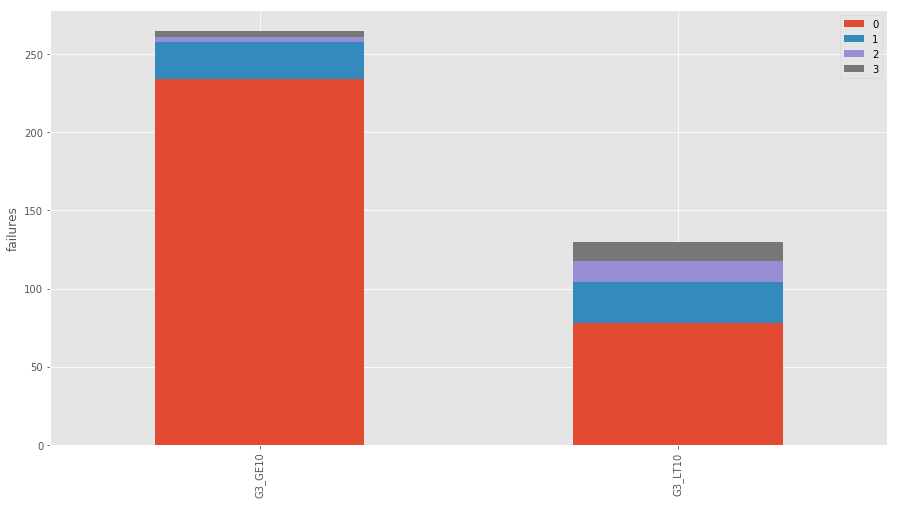

no     185
yes     80
Name: romantic, dtype: int64
no     78
yes    52
Name: romantic, dtype: int64


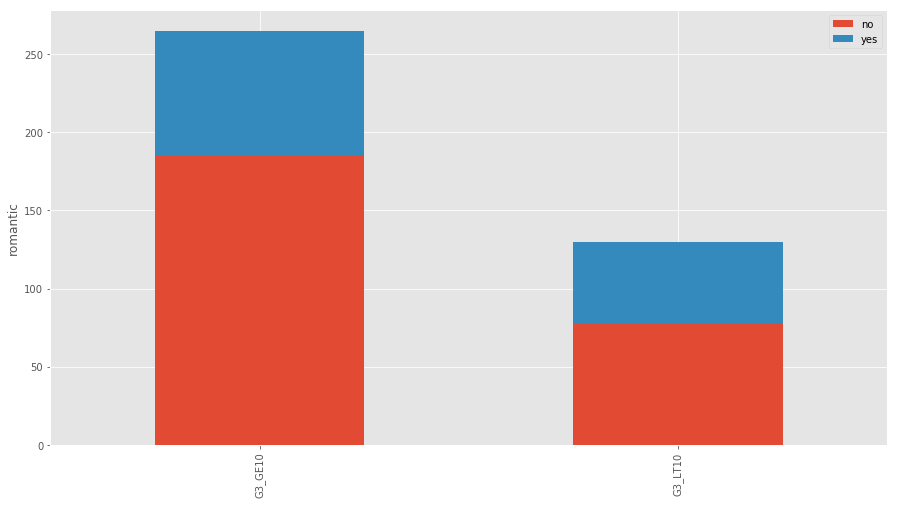

other       88
services    74
teacher     39
at_home     37
health      27
Name: Mjob, dtype: int64
other       53
services    29
at_home     22
teacher     19
health       7
Name: Mjob, dtype: int64


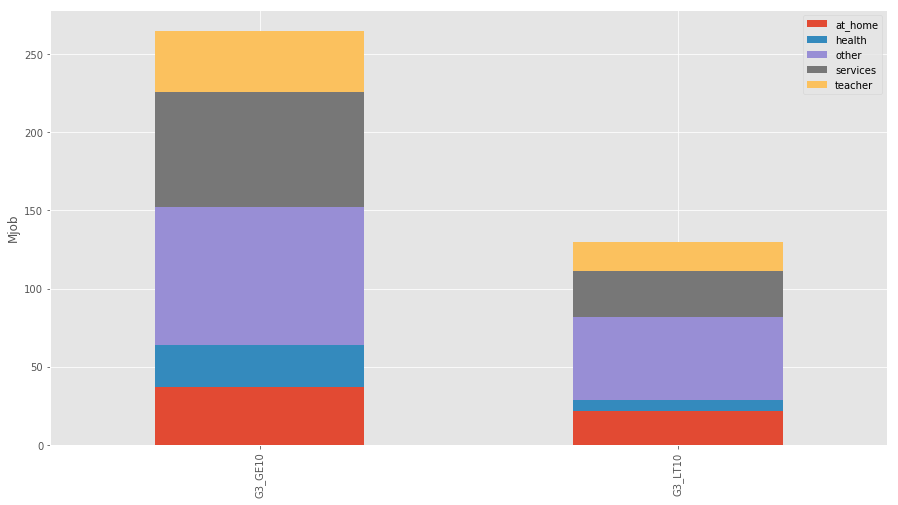

In [8]:
# Plotting bar chart for G3 >= 10 (G3_GE10) and G3 < 10 (G3_LT10) with respect to different attributes 
# (use it upto 4 classes for clarity)(nominal, binary or numeric upto 4 classes)
def plot_bar(attribute):
    G3_GE10_attribute  = data[data['G3']>=10][attribute].value_counts ()
    print(G3_GE10_attribute)
    G3_LT10_attribute  = data[data['G3']<10][attribute].value_counts ()
    print(G3_LT10_attribute)
    df = pd.DataFrame([G3_GE10_attribute, G3_LT10_attribute])
    df.index = ['G3_GE10','G3_LT10']
    df.plot(kind='bar',stacked=True, figsize=(15,8))
    plt.ylabel(attribute)
    plt.legend()
    plt.show()

# school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
#plot_bar('school')

# sex - student's sex (binary: 'F' - female or 'M' - male)
plot_bar('sex')

# address - student's home address type (binary: 'U' - urban or 'R' - rural) 
#plot_bar('address')

# famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
#plot_bar('famsize')

# Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
#plot_bar('Pstatus')

# guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
#plot_bar('guardian')

# failures - number of past class failures (numeric: n if 1<=n<3, else 4)
plot_bar('failures')

# schoolsup - extra educational support (binary: yes or no)
#plot_bar('schoolsup')

# famsup - family educational support (binary: yes or no)
#plot_bar('famsup')

# paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
#plot_bar('paid')

# activities - extra-curricular activities (binary: yes or no)
#plot_bar('activities')

# nursery - attended nursery school (binary: yes or no)
#plot_bar('nursery')

# higher - wants to take higher education (binary: yes or no)
#plot_bar('higher')

# internet - Internet access at home (binary: yes or no)
#plot_bar('internet')

# romantic - with a romantic relationship (binary: yes or no)
plot_bar('romantic')

# Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
plot_bar('Mjob')

# Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
#plot_bar('Fjob')

# reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
#plot_bar('reason')



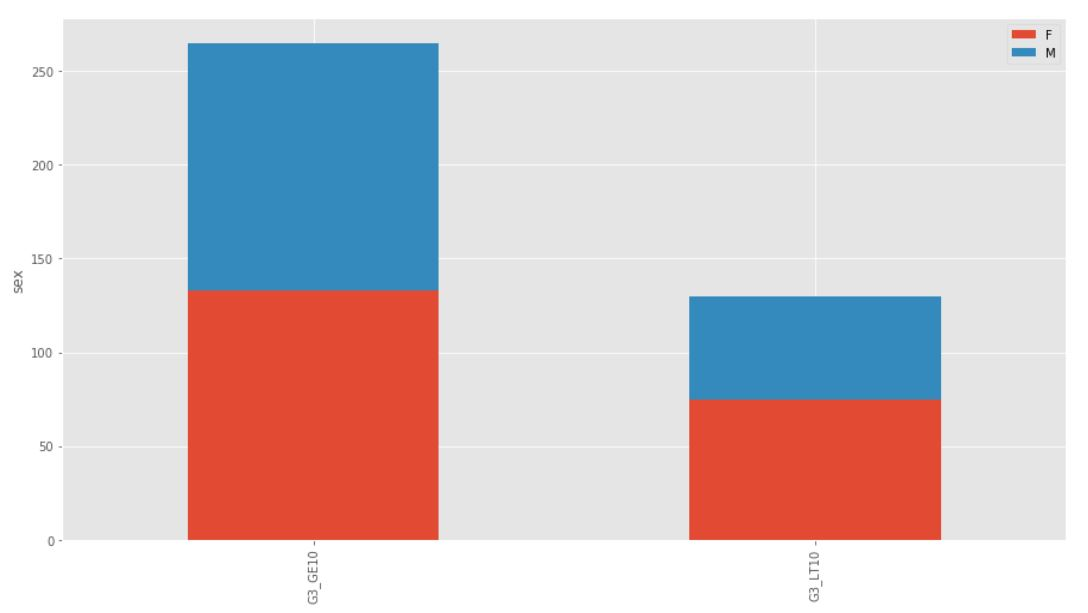

 - It looks like sex is not too significant for a given student to pass or fail. 

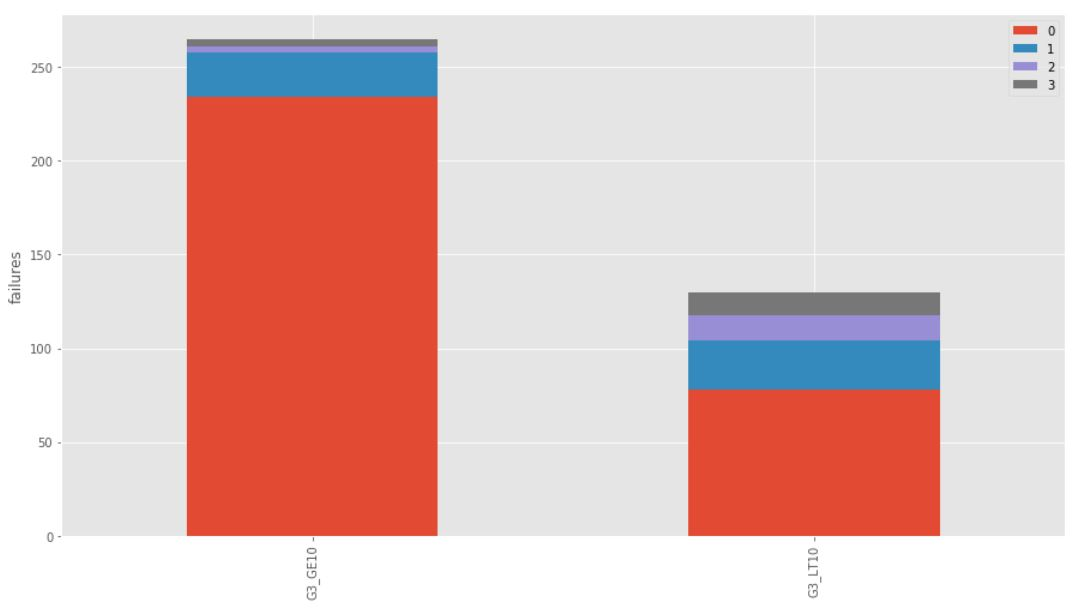

 - A student that failed previously is more likely to fail again.  

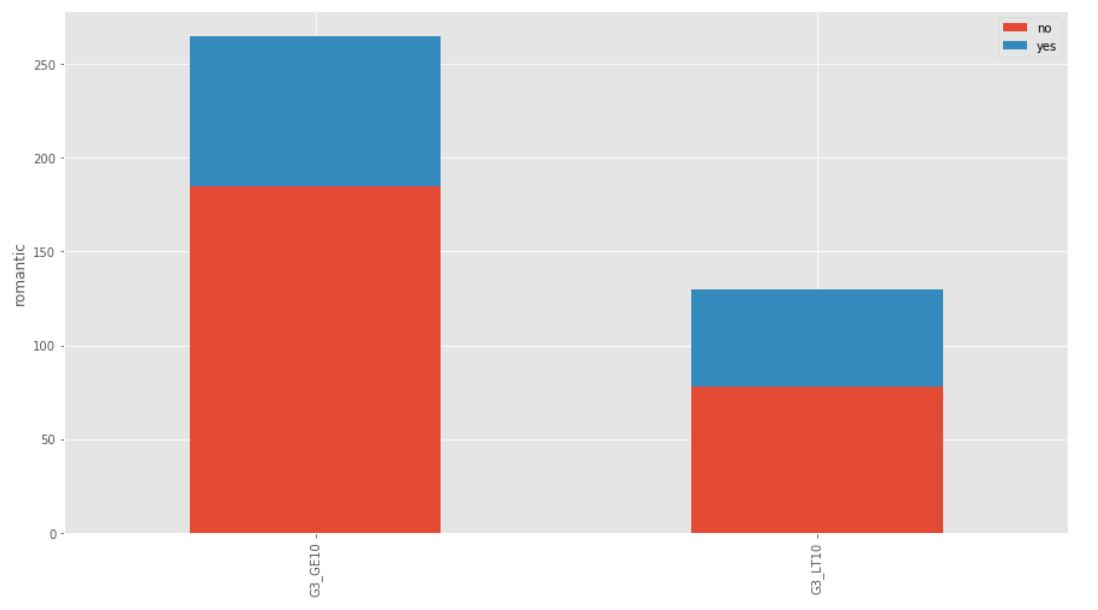

 - Students with a romantic relationship are more likely to fail.  

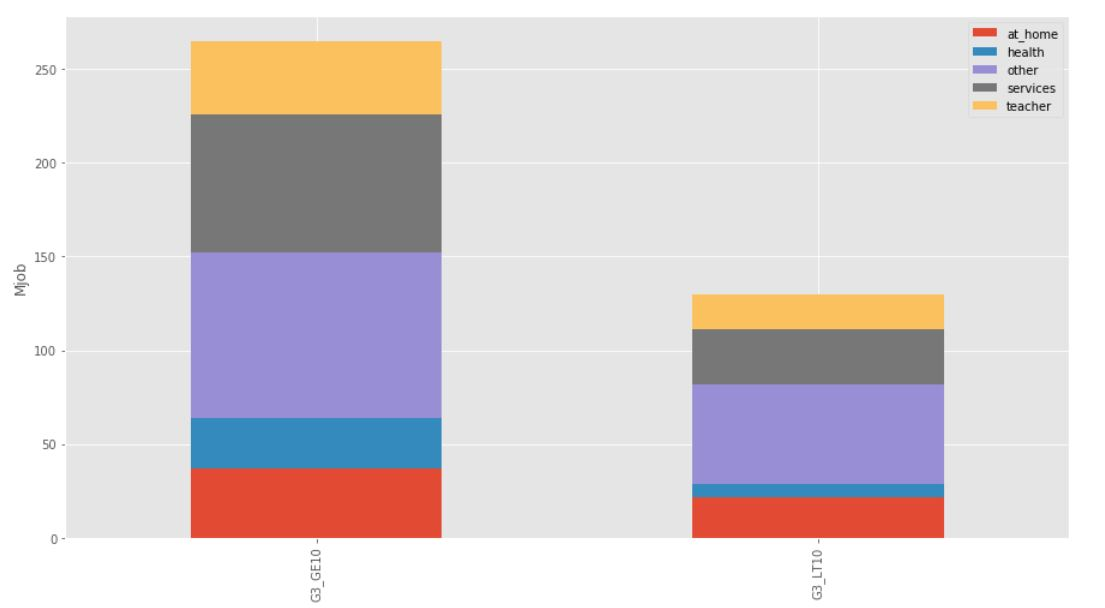

 - It looks like mother job is not a significant factor for a given student to pass or fail. 

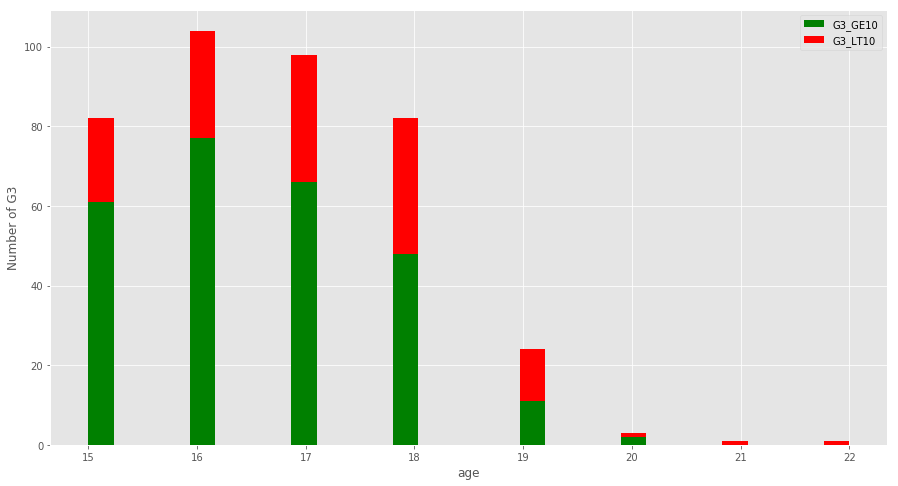

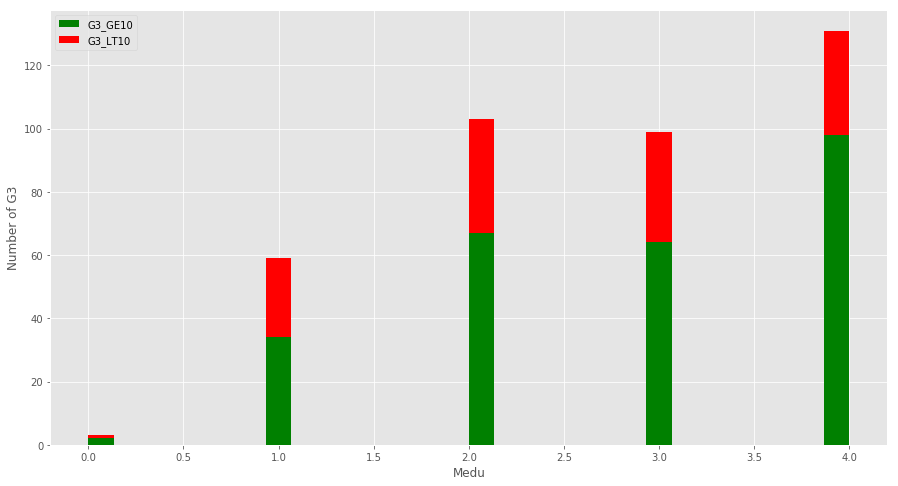

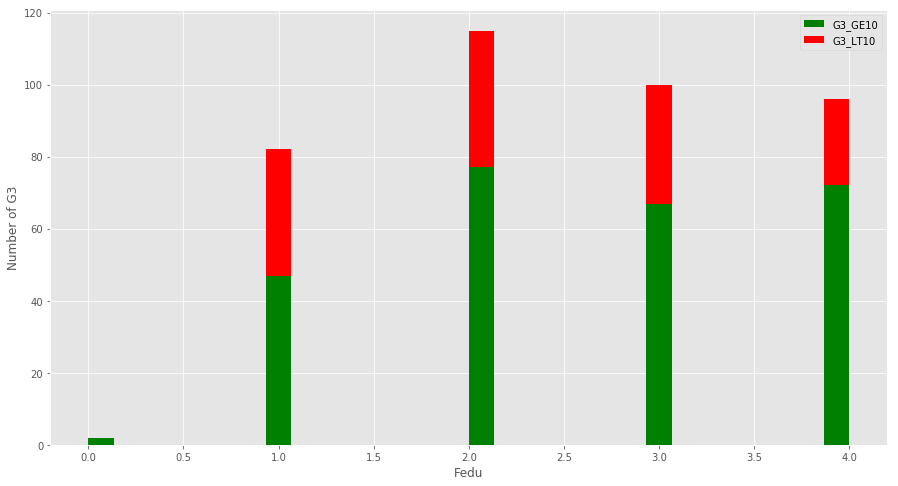

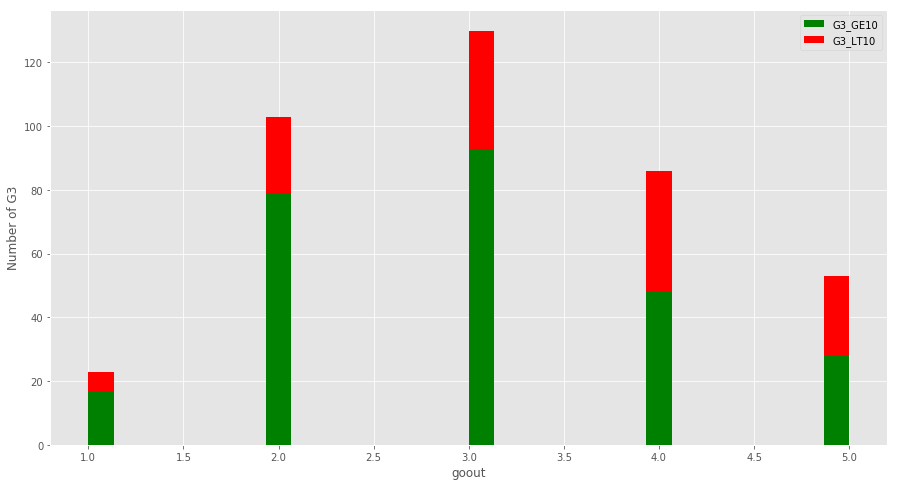

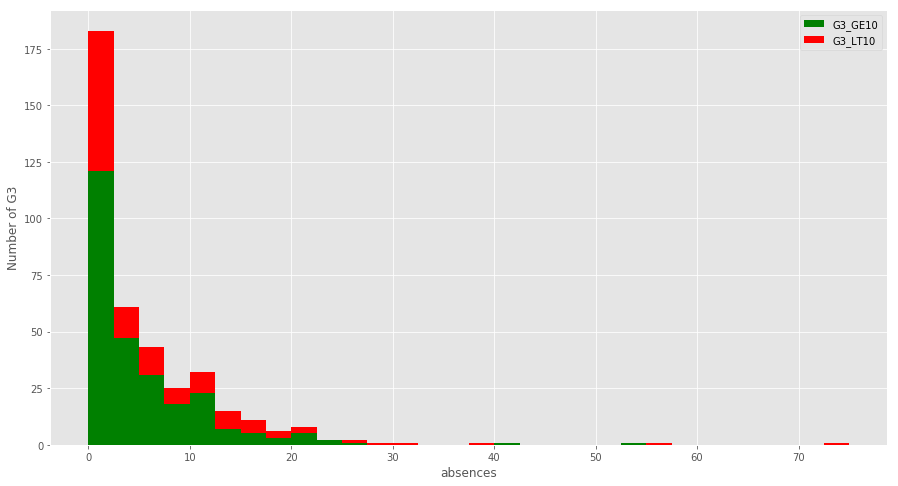

In [9]:
# Plotting histogram chart for G3 >= 10 (G3_GE10) and G3 < 10 (G3_LT10) with respect to different attributes (numeric)
def plot_hist(attribute):
    figure = plt.figure(figsize=(15,8))
    plt.hist([data[data['G3']>=10][attribute],data[data['G3']<10][attribute]], stacked=True, color = ['g','r'],
             bins = 30,label = ['G3_GE10','G3_LT10'])
    plt.xlabel(attribute)
    plt.ylabel('Number of G3')
    plt.legend()
    plt.show()

# age - student's age (numeric: from 15 to 22)
plot_hist('age')

# Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
plot_hist('Medu')

# Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
plot_hist('Fedu')

# traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
#plot_hist('traveltime')

# studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
#plot_hist('studytime')

# famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
#plot_hist('famrel')

# freetime - free time after school (numeric: from 1 - very low to 5 - very high)
#plot_hist('freetime')

# goout - going out with friends (numeric: from 1 - very low to 5 - very high)
plot_hist('goout')

# Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
#plot_hist('Dalc')

# Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
#plot_hist('Walc')

# health - current health status (numeric: from 1 - very bad to 5 - very good)
#plot_hist('health')

# absences - number of school absences (numeric: from 0 to 93)
plot_hist('absences')



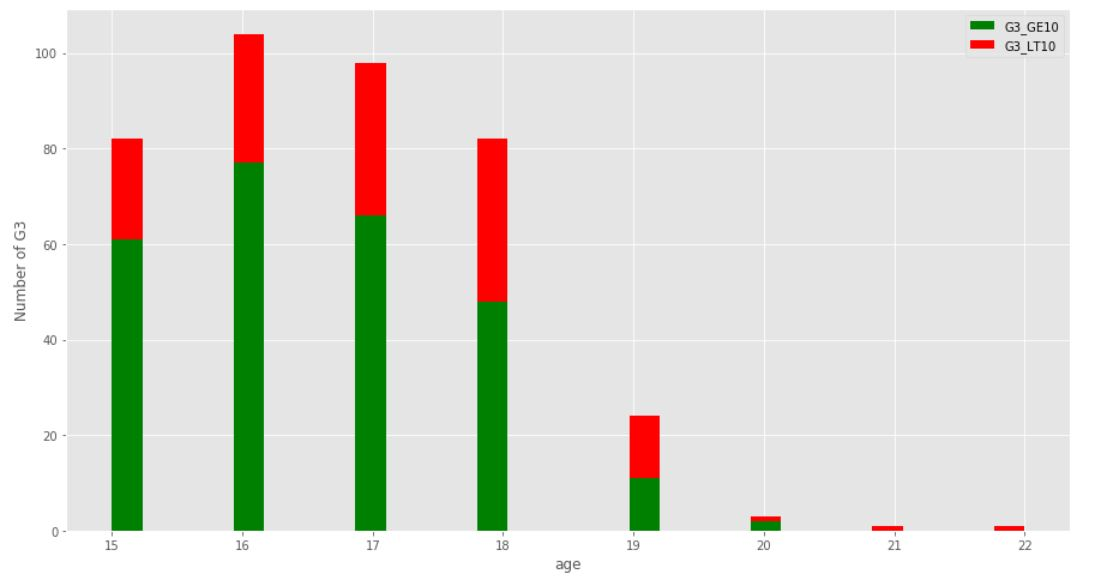

 - Older students are relatively fail as compared to the younger ones. 

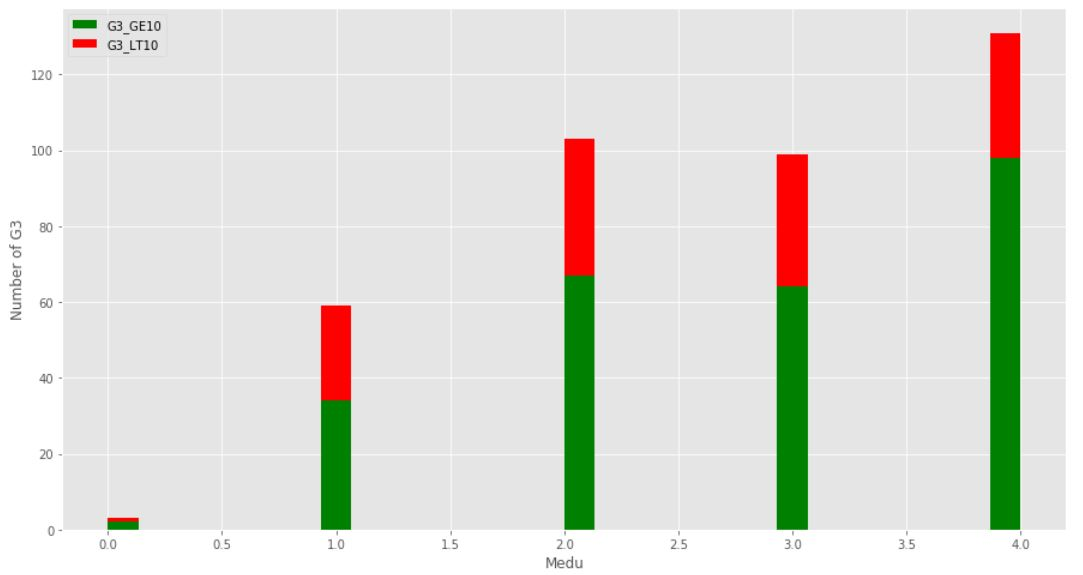

 - Students whose mothers have more education are more likely to pass the subject. 

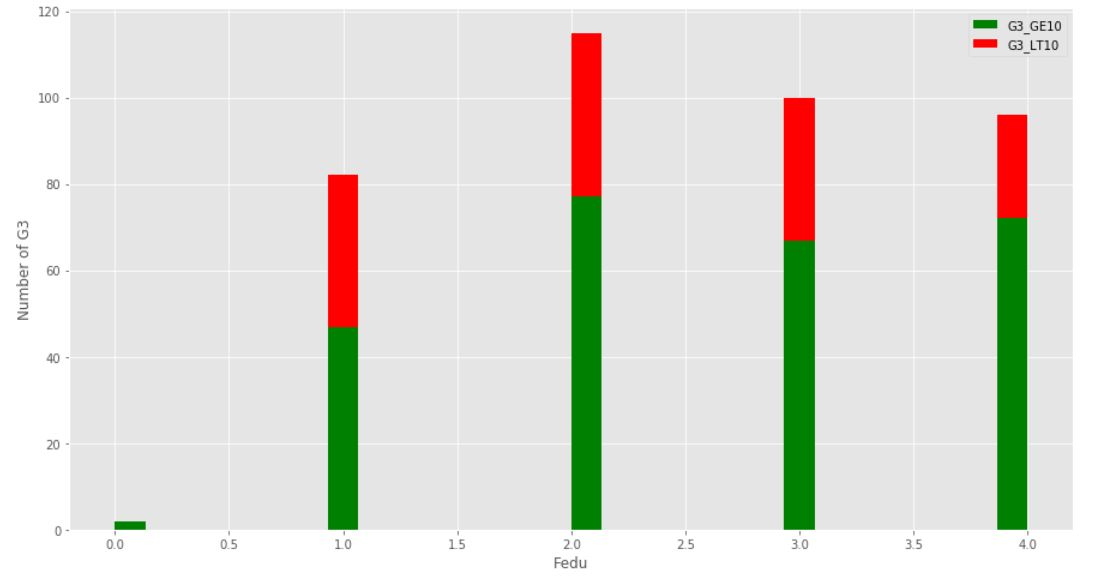

 - It looks like father's education is not a significant factor as compred to the mother's education for a given student to pass or fail. 

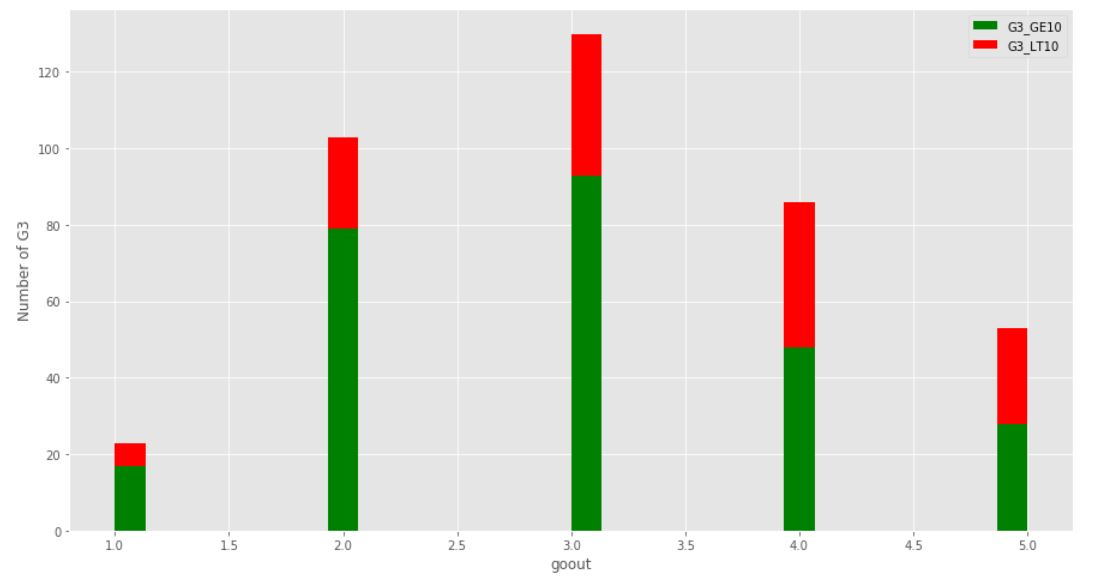

 - Students who go out with friends more frequently are more likely to fail the subject. 

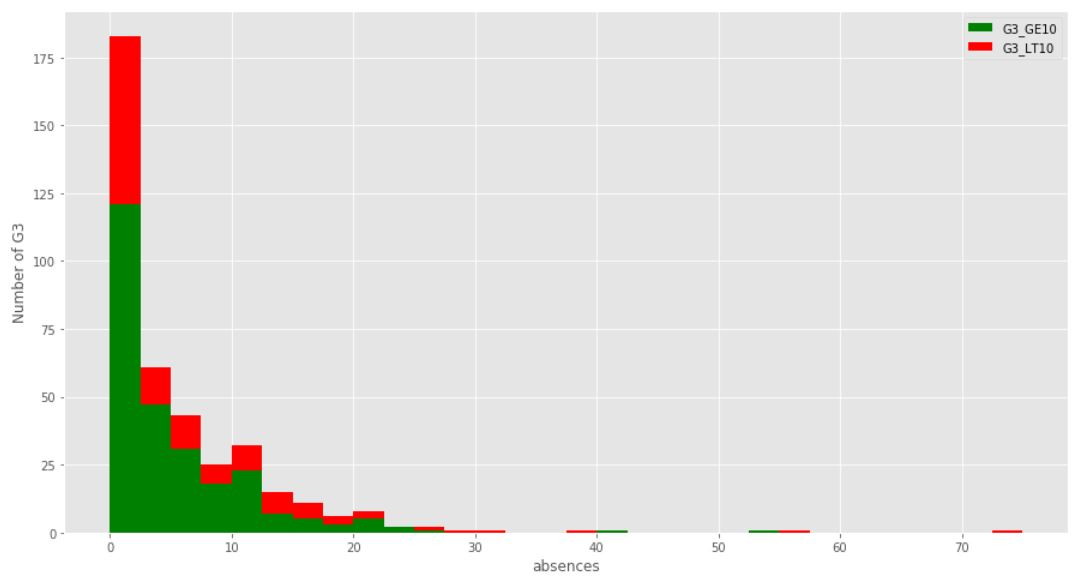

 - Students who have more absences are more likely to fail. 

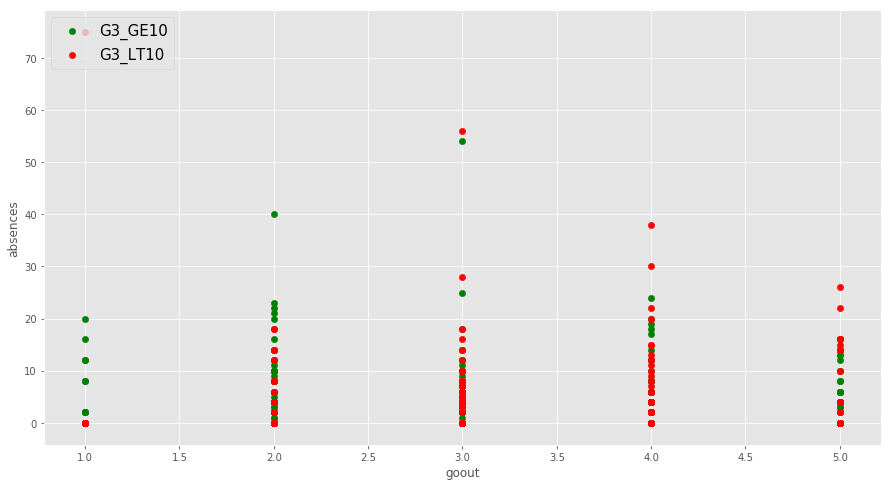

In [10]:
# Let's see the correlation of goout, absences and the final grade G3 on a single chart.
attribute1 = 'goout'
attribute2 = 'absences'
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['G3']>=10][attribute1],data[data['G3']>=10][attribute2],c='green',s=40)
ax.scatter(data[data['G3']<10][attribute1],data[data['G3']<10][attribute2],c='red',s=40)
ax.set_xlabel(attribute1)
ax.set_ylabel(attribute2)
ax.legend(('G3_GE10','G3_LT10'),scatterpoints=1,loc='upper left',fontsize=15,)
plt.show()

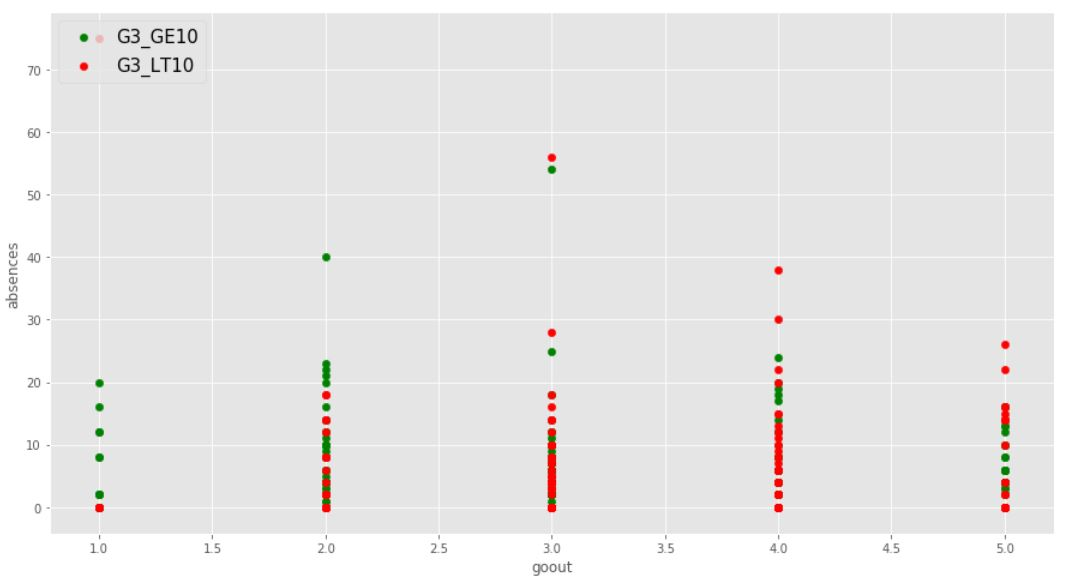

 - Students will fail if they go out with friends frequently even if they attend the classes. 

## 2 - Feature engineering

Once I do the exploratory data analysis, I will process and transform the features inorder to make the data managable by the machine learning algorithms. I will generate additional features. 


In [11]:
# Feature Engineering 

data_processed = data 
#A print function to check wheather or not the feature has been successfully processed. 
def status(attribute):
    print ('The processing of the feature ',attribute,': successful')
    

    
#Processing nominal features 
def process_nominal_columns(attribute):
    
    global data_processed
    
    # encoding the feature into dummy variable
    attribute_dummies = pd.get_dummies(data_processed[attribute],prefix=attribute)
    
    # adding the new features into the data 
    data_processed = pd.concat([data_processed,attribute_dummies],axis=1)
    
    # remove the colunm name 
    data_processed.drop(attribute,axis=1,inplace=True)
    
    status(attribute)
    
process_nominal_columns('Mjob')
process_nominal_columns('Fjob')
process_nominal_columns('reason')
process_nominal_columns('guardian')

The processing of the feature  Mjob : successful
The processing of the feature  Fjob : successful
The processing of the feature  reason : successful
The processing of the feature  guardian : successful


In [12]:
data_processed.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,4,4,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [13]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 46 columns):
school               395 non-null object
sex                  395 non-null object
age                  395 non-null int64
address              395 non-null object
famsize              395 non-null object
Pstatus              395 non-null object
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
schoolsup            395 non-null object
famsup               395 non-null object
paid                 395 non-null object
activities           395 non-null object
nursery              395 non-null object
higher               395 non-null object
internet             395 non-null object
romantic             395 non-null object
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Da

In [14]:
#Processing binary features. This function maps the string values to 1 and 0. 
def process_binary(attribute):
    
    global data_processed 
    # mapping string values to numerical for different binary features  
    
    if attribute == 'sex':
        data_processed[attribute] = data_processed[attribute].map({'M':1,'F':0})
    elif attribute == 'school':
        data_processed[attribute] = data_processed[attribute].map({'GP':1,'MS':0})
    elif attribute == 'address':
        data_processed[attribute] = data_processed[attribute].map({'U':1,'R':0})
    elif attribute == 'famsize':
        data_processed[attribute] = data_processed[attribute].map({'LE3':1,'GT3':0})
    elif attribute == 'Pstatus':
        data_processed[attribute] = data_processed[attribute].map({'T':1,'A':0})
            
    status(attribute)
    
process_binary('sex')
process_binary('school')
process_binary('address')    
process_binary('famsize')
process_binary('Pstatus')


#Processing binary features with yes or no values. This function maps the string values yes and no to 1 and 0 respectively. 
def process_binary_Yes_No(attribute):
    
    global data_processed 
    # mapping string values yes and no to numerical  
    
    data_processed[attribute] = data_processed[attribute].map({'yes':1,'no':0})
    
    status(attribute)
    
process_binary_Yes_No('schoolsup')
process_binary_Yes_No('famsup')
process_binary_Yes_No('paid')
process_binary_Yes_No('activities')
process_binary_Yes_No('nursery')
process_binary_Yes_No('higher')
process_binary_Yes_No('internet')
process_binary_Yes_No('romantic')






The processing of the feature  sex : successful
The processing of the feature  school : successful
The processing of the feature  address : successful
The processing of the feature  famsize : successful
The processing of the feature  Pstatus : successful
The processing of the feature  schoolsup : successful
The processing of the feature  famsup : successful
The processing of the feature  paid : successful
The processing of the feature  activities : successful
The processing of the feature  nursery : successful
The processing of the feature  higher : successful
The processing of the feature  internet : successful
The processing of the feature  romantic : successful


In [15]:
data_processed.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
193,1,1,16,0,0,1,3,3,1,1,0,0,1,0,1,1,1,1,0,4,3,2,3,4,5,8,8,9,10,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
354,0,1,17,0,0,1,4,3,2,2,0,0,1,1,1,0,1,1,1,4,5,5,1,3,2,4,13,11,11,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
319,1,0,18,1,0,1,4,4,1,2,0,0,1,1,0,1,1,1,0,4,4,4,3,3,5,2,11,11,11,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
236,1,1,17,1,1,1,2,2,1,2,0,0,0,1,1,0,1,1,1,4,4,2,5,5,4,4,14,13,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
285,1,1,17,1,0,1,1,1,1,2,0,0,0,1,0,0,1,1,0,4,3,3,1,2,4,2,12,10,11,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0


In [16]:
data_processed.shape

(395, 46)

(395, 46)

In [17]:
#Processing the numerical grades to 1 and 0. if grade is greater than or equal to 10 map it to 1 else 0.
def process_grades_to_binary(attribute):
    
    global data_processed 
    # mapping the numeric range to 1 or 0 
    
    data_processed[attribute] = data_processed[attribute].map(lambda x: 1 if x>=10 else 0)
    
    status(attribute)
process_grades_to_binary('G1')
process_grades_to_binary('G2')
process_grades_to_binary('G3')

The processing of the feature  G1 : successful
The processing of the feature  G2 : successful
The processing of the feature  G3 : successful


In [18]:
data_processed.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
272,1,0,18,1,1,1,1,1,2,2,0,0,1,1,0,0,1,0,0,4,4,3,1,1,3,2,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
344,1,0,18,1,0,1,2,3,1,3,0,0,1,0,0,1,1,1,0,4,3,3,1,2,3,4,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
83,1,1,15,1,1,1,2,2,2,2,0,0,0,1,1,1,1,1,0,5,3,3,1,3,4,4,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
204,1,0,16,0,0,1,2,2,2,4,0,0,1,1,1,0,1,1,0,5,3,5,1,1,5,6,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
150,1,1,18,1,1,1,1,1,1,1,3,0,0,0,0,1,0,1,1,2,3,5,2,5,4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0


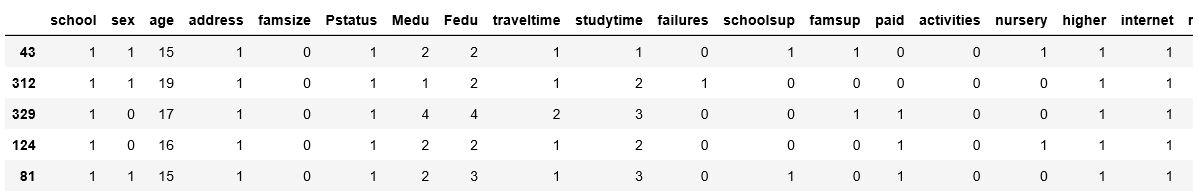

In [19]:
# This function drops the target features (grades)
def drop_grades():
    
    global data_processed 

    # extracting and then removing the targets from the dataset 
    grades = [data_processed.G1,data_processed.G2,data_processed.G3]
    target = data_processed.G3 
    data_processed.drop(['G1','G2','G3'],1,inplace=True)
    
    return grades, target

allgrades, targetG3 = drop_grades() 

In [20]:
data_processed.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
320,1,0,17,1,0,0,4,3,1,2,0,0,1,1,0,1,1,1,1,5,2,2,1,2,5,23,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
32,1,1,15,0,0,1,4,3,1,2,0,0,1,0,1,1,1,1,1,4,5,2,1,1,5,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
236,1,1,17,1,1,1,2,2,1,2,0,0,0,1,1,0,1,1,1,4,4,2,5,5,4,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
376,0,0,20,1,0,1,4,2,2,3,2,0,1,1,0,0,1,1,1,5,4,3,1,1,3,4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
254,1,1,17,0,0,1,2,1,1,1,0,0,0,0,0,0,1,1,0,4,4,2,2,4,5,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [21]:
y=targetG3
print(y)
data_processed.shape

0      0
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      1
10     0
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     1
21     1
22     1
23     1
24     0
25     0
26     1
27     1
28     1
29     1
      ..
365    1
366    1
367    0
368    1
369    1
370    0
371    1
372    1
373    0
374    1
375    1
376    1
377    1
378    1
379    1
380    1
381    0
382    1
383    0
384    0
385    1
386    0
387    0
388    0
389    0
390    0
391    1
392    0
393    1
394    0
Name: G3, Length: 395, dtype: int64


(395, 43)

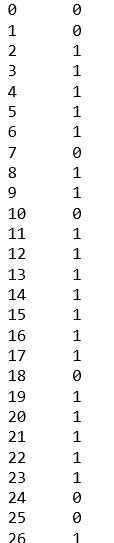

In [22]:
# This function normalize the dataset 
def normalize_all_features():
    
    global data_processed 
    
    features = list(data_processed.columns)
    data_processed[features] = data_processed[features].apply(lambda x: x/x.max(), axis=0)
    
    print ('Features normalized successfully !')
    
normalize_all_features()

Features normalized successfully !


In [23]:
data_processed.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
197,1.0,1.0,0.727273,0.0,1.0,1.0,0.75,0.75,0.75,0.25,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.6,0.6,0.8,0.6,1.0,0.6,0.106667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
350,0.0,1.0,0.863636,0.0,0.0,1.0,0.25,0.25,0.75,0.50,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.8,0.8,0.6,0.6,0.4,0.106667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
33,1.0,1.0,0.681818,1.0,1.0,1.0,0.75,0.75,0.25,0.50,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.6,0.4,0.2,0.2,0.4,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
169,1.0,0.0,0.727273,1.0,0.0,1.0,1.00,1.00,0.25,0.50,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.8,0.8,0.4,0.2,0.2,0.6,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
208,1.0,0.0,0.727273,1.0,0.0,1.0,0.25,0.25,0.50,0.25,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.8,0.6,0.4,0.2,0.8,1.0,0.080000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


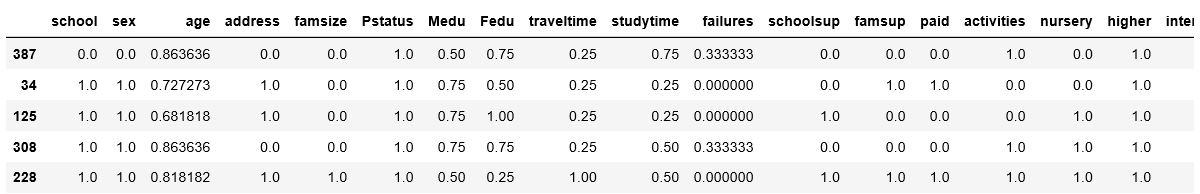

## 3 - Modeling

We develop statistical models on the features that are generated using feature engineering. We can use different models from logistic regression to decision trees and more sophisticated ones such as random forests.

In this work, I use Random Forests as they have shown great performance and are easy to interpret. 

I will do the following steps:
    
 - Divide the dataset into training and testing sets. 
 - Build a predictive model using the training set to predict the target grade G3 if it is greater than or equal to 10 or otherwise.
 - Evaluate the model performance on the train set.
 - Test the model on test set and output the corresponding predictions. 


In [25]:
# Modeling 

#Importing the useful libraries from sklearn 

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier


In [26]:
#Evaluate the model using a 5-fold cross validation with the Accuracy metric.
def compute_score(clf, X, y,scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5,scoring=scoring)
    return np.mean(xval)

In [27]:
#Split the dataset into the train set and the test set with 80% and 20% ratio respectively 
def split_train_test_target():
    global data_processed, y 
    
    X_train, X_test, y_train, y_test = train_test_split(data_processed, y, test_size=0.20, random_state=42)
  
    return X_train, X_test, y_train, y_test  


In [28]:
X_train, X_test, y_train, y_test = split_train_test_target()

In [29]:
X_test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
78,1.0,1.0,0.772727,1.0,0.0,1.0,0.50,0.25,0.50,0.25,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.8,1.0,0.2,0.2,0.2,0.6,0.026667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
371,0.0,1.0,0.818182,0.0,1.0,1.0,0.25,0.50,0.75,0.25,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.8,0.6,0.6,0.4,0.6,0.6,0.040000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
248,1.0,1.0,0.818182,0.0,1.0,1.0,0.75,0.75,0.25,0.50,0.333333,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.8,0.6,0.6,0.2,0.6,1.0,0.106667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
55,1.0,0.0,0.727273,1.0,0.0,0.0,0.50,0.25,0.25,0.50,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.6,0.8,0.2,0.2,0.4,0.106667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
390,0.0,1.0,0.909091,1.0,1.0,0.0,0.50,0.50,0.25,0.50,0.666667,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.8,0.8,1.0,0.8,0.146667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
223,1.0,1.0,0.818182,1.0,0.0,1.0,0.50,0.50,0.50,0.50,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.6,0.6,0.6,1.0,1.0,0.8,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
42,1.0,1.0,0.681818,1.0,0.0,1.0,1.00,1.00,0.25,0.50,0.000000,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.8,0.6,0.6,0.2,0.2,1.0,0.026667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
234,1.0,1.0,0.727273,1.0,1.0,1.0,0.25,0.25,0.50,0.50,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.6,0.8,0.4,0.2,0.2,1.0,0.240000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
316,1.0,0.0,0.818182,1.0,0.0,1.0,0.50,0.25,0.50,0.50,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.6,0.6,0.2,0.4,0.2,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
116,1.0,1.0,0.681818,1.0,0.0,1.0,1.00,1.00,0.50,0.50,0.000000,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.8,0.8,0.6,0.2,0.2,0.4,0.026667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [30]:
y_test

78     1
371    1
248    0
55     1
390    0
223    1
42     1
234    0
316    0
116    1
9      1
209    0
323    1
393    1
258    1
155    0
124    0
272    1
324    1
334    0
15     1
391    1
167    1
0      0
140    0
113    1
77     1
33     1
101    1
76     1
      ..
196    1
39     1
56     1
30     1
377    1
386    0
132    1
285    1
168    0
22     1
31     1
94     1
193    1
157    1
177    0
370    0
182    1
255    0
358    1
317    0
5      1
45     0
84     1
289    1
110    1
364    1
82     0
114    0
3      1
18     0
Name: G3, Length: 79, dtype: int64

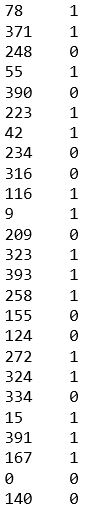

In [31]:
#To compute feature importance, we can use Tree-based estimators that are aslo used to discard irrelevant features.
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(X_train, y_train)

In [32]:
#Take a look at the importance of each feature.
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_

                   importance
feature                      
Fjob_teacher         0.007585
Fjob_health          0.008728
Mjob_health          0.009629
Pstatus              0.011197
reason_other         0.011271
Fjob_at_home         0.011277
Mjob_teacher         0.013491
school               0.014573
Fjob_other           0.015447
Mjob_at_home         0.016468
guardian_mother      0.017117
guardian_father      0.017161
reason_home          0.017192
Fjob_services        0.017428
Mjob_other           0.017568
reason_course        0.017580
reason_reputation    0.018314
Mjob_services        0.018675
guardian_other       0.019161
nursery              0.019392
internet             0.019392
address              0.019697
romantic             0.020196
famsize              0.021568
sex                  0.022214
famsup               0.022368
higher               0.023194
schoolsup            0.023255
activities           0.024000
traveltime           0.024558
Dalc                 0.025060
paid      

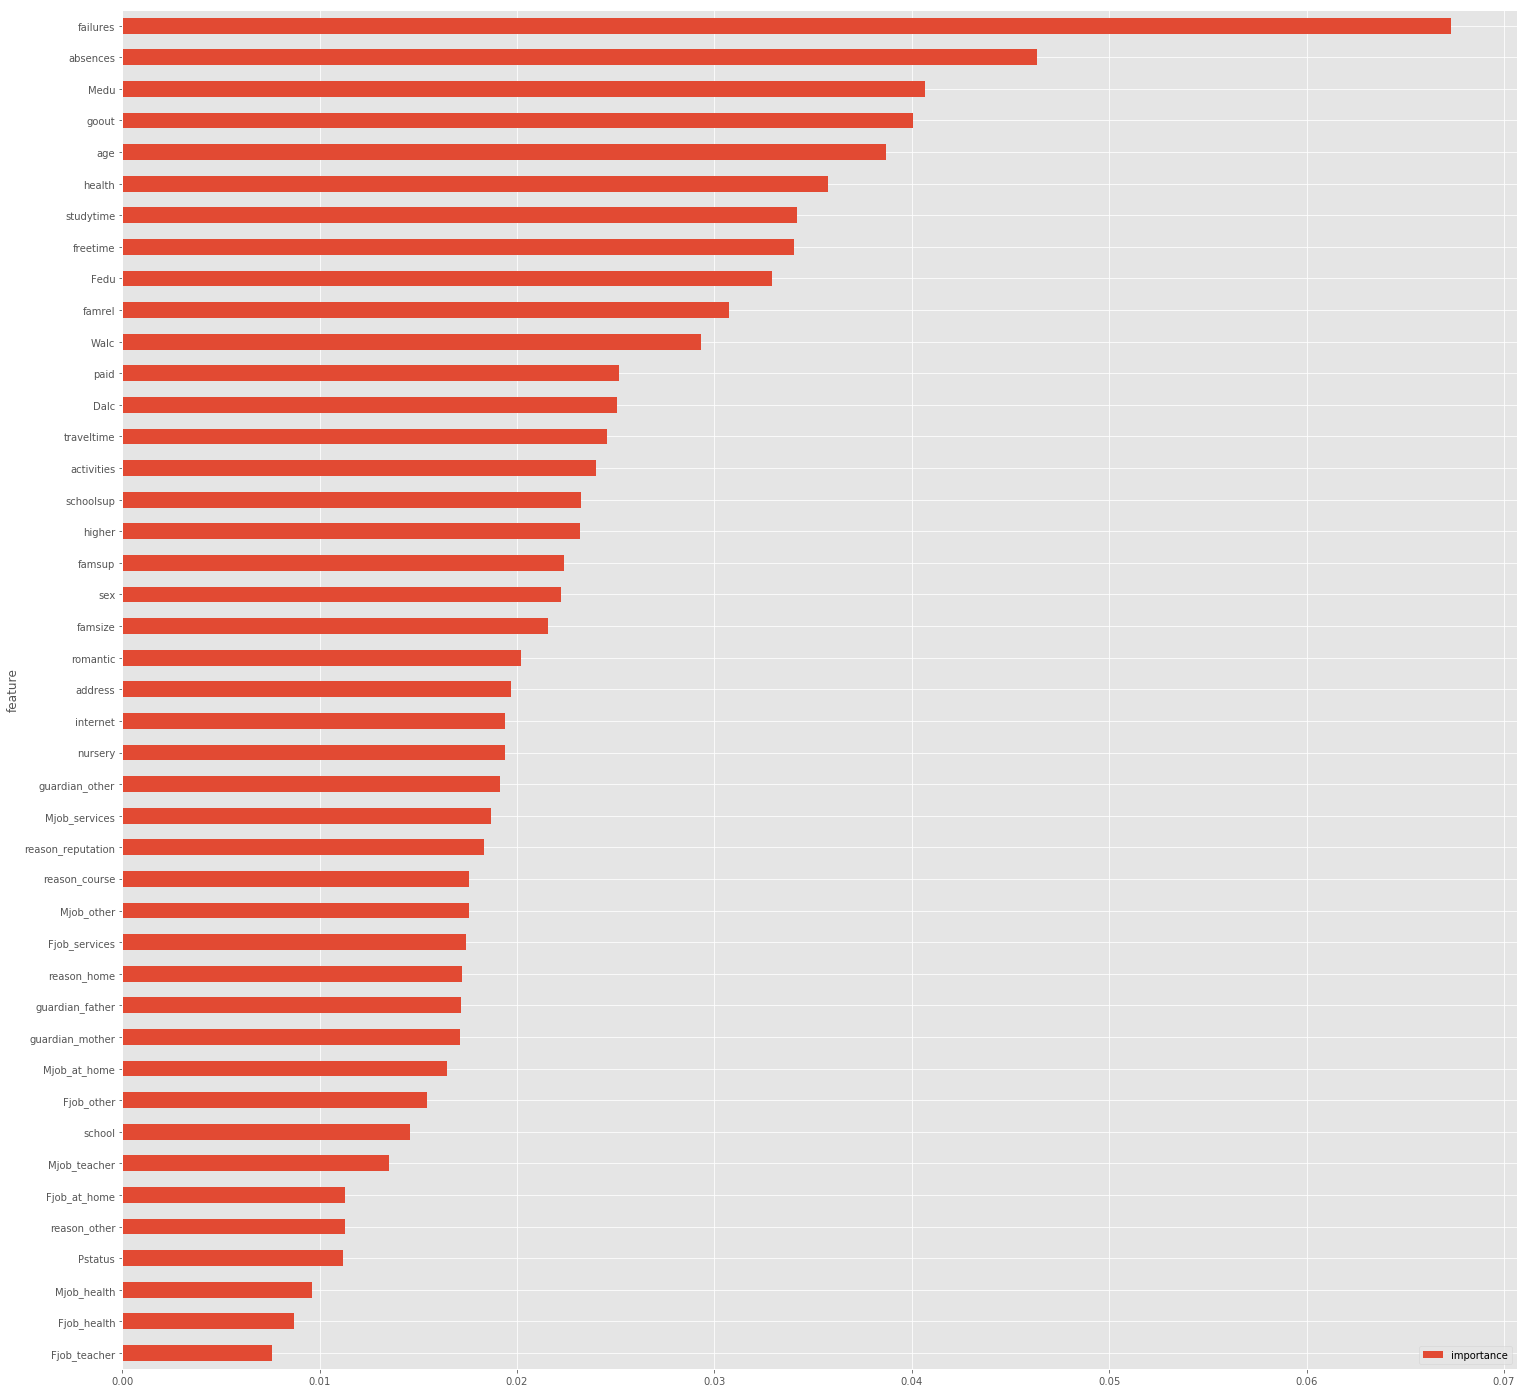

In [33]:
features.sort_values(by=['importance'],ascending=True, inplace=True)
#features.sort_values(by=['col1'])
features.set_index('feature', inplace=True)
print(features)
features.plot(kind='barh', figsize=(25, 25))
plt.show()

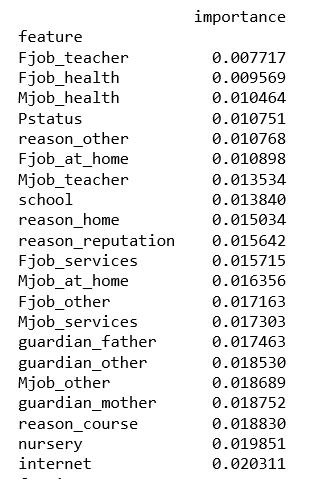

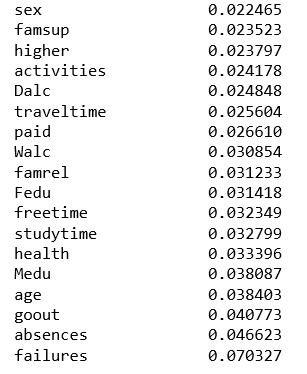

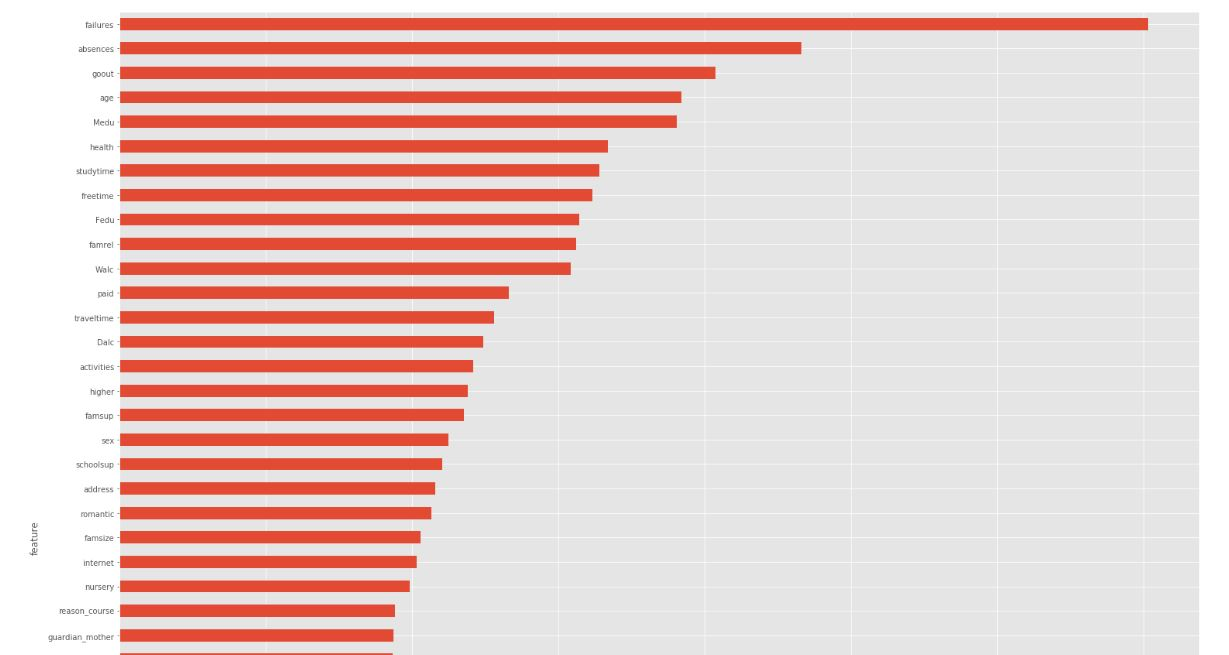

In [34]:
print(X_train.shape)
# Transform the train set and test set into a more compact dataset.
model = SelectFromModel(clf, prefit=True)
X_train_new = model.transform(X_train)
X_train_new.shape

(316, 43)


(316, 15)

(316, 43)

(316, 17)

In [35]:
X_test_new = model.transform(X_test)
X_test_new.shape

(79, 15)

(79, 17)

In [36]:
#Let's use Random Forest as they are handy for interpretability. 
#We can tweak some of the parameters for an optimal model.
randforest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [2,3,4,5,6,7,8],
                 'n_estimators': [50,100,110,150,170,200,210,240,250],
                 'criterion': ['gini','entropy']
                 }

cross_val = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(randforest ,
                           param_grid=parameter_grid,
                           cv=cross_val)

grid_search.fit(X_train_new, y_train)

print('The best performance: {}'.format(grid_search.best_score_))
print('The best parameters: {}'.format(grid_search.best_params_))

The best performance: 0.7373417721518988
The best parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 150}


The best performance: 0.7373417721518988

The best parameters: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}

In [37]:
output = grid_search.predict(X_test_new).astype(int)
df_output = pd.DataFrame()
df_output['Actual'] = y_test
df_output['Predicted'] = output
print (df_output)
df_output['Diff'] =  np.where(df_output['Actual'] == df_output['Predicted'],1,0)
#print(df_output.shape[0])
print('Test Accuracy: ',100*df_output['Diff'].sum()/df_output.shape[0])
df_output[['Actual','Predicted']].to_csv('output.csv',index=False)

     Actual  Predicted
78        1          0
371       1          1
248       0          1
55        1          1
390       0          0
223       1          1
42        1          1
234       0          1
316       0          1
116       1          1
9         1          1
209       0          1
323       1          1
393       1          1
258       1          1
155       0          1
124       0          1
272       1          1
324       1          1
334       0          1
15        1          1
391       1          1
167       1          1
0         0          1
140       0          1
113       1          1
77        1          1
33        1          1
101       1          1
76        1          1
..      ...        ...
196       1          1
39        1          1
56        1          1
30        1          1
377       1          1
386       0          1
132       1          1
285       1          1
168       0          1
22        1          1
31        1          1
94        1

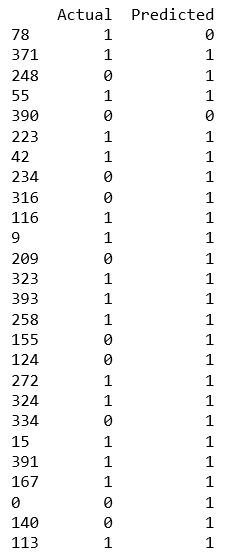

[79 rows x 2 columns]

Test Accuracy:  72.1518987342

 - I developed a predictive model on the student dataset using Random Forests inorder to predict if a given student will pass or fail, with training and testing accuracy of about 70%. The accuracy could be improved if more work on the parameter tuning is done and also more data is available. 